# Jobposts: Get Similarity with cosine similarity in feature: job description
A small notebook to see if cosine similarity works on feature job description


This is the implementation of tfidfvectorizer with cosine similarity. May change input variables:

In [279]:
def job_description(sentence1, sentence2):


  sentences = [sentence1, sentence2]


  tf_vec = TfidfVectorizer(use_idf=True) # tfidvectorizer

              
  vectors = tf_vec.fit_transform(sentences).toarray() #transform documents into vectors
  cosine = cosine_similarity(vectors) #use cosine similarity on vectors



  similarity_df = pd.DataFrame(cosine) #save matrix in pandas dataframe to use melt method on it

  transform_df = pd.melt(similarity_df) #reshape matrix into column of dataframe

  similarity = transform_df["value"].values[1] #get value


  


  #just for testing (not finished yet)

  if similarity > 0.7:
    return 6

  if similarity < 0.7 and similarity >= 0.4:
    return 5

  elif similarity < 0.4 and similarity >= 0.1:
    return 3

  elif similarity < 0.1:
    return 0

In [280]:
test = job_description(corpus[0], corpus[1])
test

3

#### Imports

In [9]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Load Dataset

In [5]:
df = pd.read_excel("./data_scientist_united_states_job_postings_jobspikr.xlsx")
df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 06:26:22,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 06:33:41,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 06:33:35,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 06:33:42,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 06:48:23,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 02:55:15,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Join Upstart and help build the future of cred...,Full Time,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>_x000D_\n<p><span>Compe...
9996,2019-10-01 02:50:33,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>_x000D_\n<p><span>Locat...
9997,2019-09-26 02:53:10,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 02:41:31,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>_x000D_\n<p><span>Locat...


#### Data Preparation

In [275]:
c = df["job_description"].iloc[0:100] #Change here the sample size
corpus = list(c.dropna())
#corpus

#### Transform words into vectors

In [218]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus[0:2])
c = pd.DataFrame(cosine_similarity(X))
y = pd.melt(c)
y

,variable,value
0,0,1.00000
1,0,0.50567
2,1,0.50567
3,1,1.00000


##### Cosine similarity

In [ ]:
#cosine_similarity(dtm)

#### Function
A small function to find similarity in feature job description

In [282]:
def test_method(sentences):


  count_vec = CountVectorizer() #vectorizer 

              
  vectors = count_vec.fit_transform(sentences).toarray() # transform words into vectors
  cosine = cosine_similarity(vectors) #use cosine similarity on vectors



  similarity_df = pd.DataFrame(cosine) #save matrix in pandas dataframe to use melt method on it

  transform_df = pd.melt(similarity_df) #reshape matrix into column of dataframe

  similarity = transform_df["value"].values[1] #get value

  #print(transform_df["value"]) #for debugging
  


  #just for testing 

  if similarity > 0.7:
    return 6

  if similarity < 0.7 and similarity >= 0.4:
    return 5

  elif similarity < 0.4 and similarity >= 0.1:
    return 3

  elif similarity < 0.1:
    return 0






In [281]:
test = test_method(corpus[0:2])
test

5

---------------

#### small Evaluation 

Teil 1. Zwei exakte Sätze    
Ground Truth: 6   
Ergebnis: 6  


In [91]:
sentenes = ["Hello, my name is josh Starmer", "Hello my name is josh Starmer"]
test_method(sentenes)

0    1.0
1    1.0
2    1.0
3    1.0
Name: value, dtype: float64


6

Teil 2. Zwei unterschiedliche Sätze mit keinen ähnlicher Strucktur   
Ground Truth: 0   
Ergebnis: 0  

In [92]:
sentenes = ["Hello, my name is josh Starmer", "Your are stupid"]
test_method(sentenes)

0    1.0
1    0.0
2    0.0
3    1.0
Name: value, dtype: float64


0

Teil 3. Zwei unterschiedliche Sätze mit identischer Satzstrucktur   
Ground Truth: 5/6       
Ergebnis: 6  

In [93]:
sentenes = ["Hello, my name is josh Starmer", "Hello my name is Betty"]
test_method(sentenes)

0    1.000000
1    0.730297
2    0.730297
3    1.000000
Name: value, dtype: float64


6

Teil 4. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 6   
Ergebnis: 3 ?  

In [96]:
sentenes = ["Hello, my name is josh Starmer", "Hey whats up? Here ist Josh starmer"]
test_method(sentenes)

0    1.000000
1    0.308607
2    0.308607
3    1.000000
Name: value, dtype: float64


3

Teil 5. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 6   
Ergebnis: 6  

In [97]:
sentenes = ["Hello, my name is josh Starmer", "Hey whats up, my name is josh Starmer"]
test_method(sentenes)

0    1.000000
1    0.721688
2    0.721688
3    1.000000
Name: value, dtype: float64


6

Teil 6. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 6   
Ergebnis: 6  

In [79]:
sentences = ['Hi, how are you?', 'Hey what\'s up?']
test_method(sentenes)

0    1.000000
1    0.721688
2    0.721688
3    1.000000
Name: value, dtype: float64


6

---------------------

#### Small Evaluation with (Tf-idf Vektorizer)

In [284]:
def test_method2(sentences):

  point = 0

  count_vec = TfidfVectorizer(use_idf=True) # tfidvectorizer

              
  vectors = count_vec.fit_transform(sentences).toarray() #may turn sentences in list
  cosine = cosine_similarity(vectors) #use cosine similarity on vectors



  similarity_df = pd.DataFrame(cosine) #save matrix in pandas dataframe to use melt method on it

  transform_df = pd.melt(similarity_df) #reshape matrix into column of dataframe

  similarity = transform_df["value"].values[1] #get value


  #print(transform_df["value"]) #for debugging
  


  #just for testing (not finished yet)

  if similarity > 0.7:
    return 6

  if similarity < 0.7 and similarity >= 0.4:
    return 5

  elif similarity < 0.4 and similarity >= 0.1:
    return 3

  elif similarity < 0.1:
    return 0

Zwei Jop-posts descriptions:

In [283]:
test = test_method2(corpus[0:2])
test

3

Teil 1. Zwei exakte Sätze    
Ground Truth: 6   
Ergebnis: 6  

In [128]:
sentenes = ["Hello, my name is josh Starmer", "Hello my name is josh Starmer"]
test_method2(sentenes)

0    1.0
1    1.0
2    1.0
3    1.0
Name: value, dtype: float64


6

Teil 2. Zwei unterschiedliche Sätze mit keinen ähnlicher Strucktur   
Ground Truth: 0   
Ergebnis: 0  

In [129]:
sentenes = ["Hello, my name is josh Starmer", "Your are stupid"]
test_method2(sentenes)

0    1.0
1    0.0
2    0.0
3    1.0
Name: value, dtype: float64


0

Teil 3. Zwei unterschiedliche Sätze mit identischer Satzstrucktur   
Ground Truth: 5/6       
Ergebnis: 6  

In [130]:
sentenes = ["Hello, my name is josh Starmer", "Hello my name is Betty"]
test_method2(sentenes)

0    1.000000
1    0.580333
2    0.580333
3    1.000000
Name: value, dtype: float64


5

Teil 4. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 6   
Ergebnis: 3 ?  

In [131]:
sentenes = ["Hello, my name is josh Starmer", "Hey whats up? Here ist Josh starmer"]
test_method2(sentenes)

0    1.000000
1    0.184432
2    0.184432
3    1.000000
Name: value, dtype: float64


3

Teil 5. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 5/6   
Ergebnis: 5  

In [132]:
sentenes = ["Hello, my name is josh Starmer", "Hey whats up, my name is josh Starmer"]
test_method2(sentenes)

0    1.000000
1    0.572739
2    0.572739
3    1.000000
Name: value, dtype: float64


5

Teil 6. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 5/6   
Ergebnis: 5  

In [133]:
sentences = ['Hi, how are you?', 'Hey what\'s up?']
test_method2(sentenes)

0    1.000000
1    0.572739
2    0.572739
3    1.000000
Name: value, dtype: float64


5

Teil 7. Zwei unterschiedliche Sätze mit identischer Satzstrucktur   
Ground Truth: 5/6       
Ergebnis: 5     

In [134]:
sentenes = ["Hello, my name is josh Starmer", "Hello my name is Betty"]
test_method2(sentenes)

0    1.000000
1    0.580333
2    0.580333
3    1.000000
Name: value, dtype: float64


5

**Conclusion:** Die Evaluationen von oben haben ergeben, dass der Countvectorizer und der TfidfVectorizer fast identische Ergebnisse liefern.

------------------

#### Small Evaluation with (Tf-idf Vektorizer) and text-preprocessing

In [247]:
def test_method3(sentences):

  point = 0

  count_vec = TfidfVectorizer(stop_words='english', use_idf=True)

              
  vectors = count_vec.fit_transform(sentences).toarray() #may turn sentences in list
  cosine = cosine_similarity(vectors) #use cosine similarity on vectors



  similarity_df = pd.DataFrame(cosine) #save matrix in pandas dataframe to use melt method on it

  transform_df = pd.melt(similarity_df) #reshape matrix into column of dataframe

  similarity = transform_df["value"].values[1]
  #print(transform_df["value"])
  


  #just for testing (not finished yet)

  if similarity > 0.7:
    return 6

  if similarity < 0.7 and similarity >= 0.4:
    return 5

  elif similarity < 0.4 and similarity >= 0.1:
    return 3

  elif similarity < 0.1:
    return 0

In [237]:
#A small function to remove digits and special chars like: ?, , 
def clean_text(documents):
  nlp = spacy.load("en_core_web_sm")
  new_corpus = []
  for document in documents:
    filler = ""
    doc = nlp(document)
    for token in doc:
      if token.is_stop:
        continue
        
      if token.is_alpha:
        filler += " " +  token.text

    new_corpus += [filler[1:len(filler)]]

  return new_corpus

In [124]:
new_corpus = clean_text(corpus)

Zwei Jop-posts descriptions:

In [137]:
test = test_method3(new_corpus[0:2])
test

0    1.000000
1    0.216887
2    0.216887
3    1.000000
Name: value, dtype: float64


3

Teil 1. Zwei exakte Sätze    
Ground Truth: 6   
Ergebnis: 6  

In [138]:
sentenes = clean_text(["Hello, my name is josh Starmer", "Hello my name is josh Starmer"])
test_method2(sentenes)

0    1.0
1    1.0
2    1.0
3    1.0
Name: value, dtype: float64


6

Teil 2. Zwei unterschiedliche Sätze mit keinen ähnlicher Strucktur   
Ground Truth: 0   
Ergebnis: 0  

In [139]:
sentenes = clean_text(["Hello, my name is josh Starmer", "Your are stupid"])
test_method3(sentenes)

0    1.0
1    0.0
2    0.0
3    1.0
Name: value, dtype: float64


0

Teil 3. Zwei unterschiedliche Sätze mit identischer Satzstrucktur   
Ground Truth: 5/6       
Ergebnis: 3  

In [140]:
sentenes = clean_text(["Hello, my name is josh Starmer", "Hello my name is Betty"])
test_method3(sentenes)

0    1.000000
1    0.260556
2    0.260556
3    1.000000
Name: value, dtype: float64


3

Teil 4. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 6   
Ergebnis: 5?  

In [141]:
sentenes = clean_text(["Hello, my name is josh Starmer", "Hey whats up? Here ist Josh starmer"])
test_method3(sentenes)

0    1.000000
1    0.411207
2    0.411207
3    1.000000
Name: value, dtype: float64


5

Teil 5. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 5/6   
Ergebnis: 5

In [142]:
sentenes = clean_text(["Hello, my name is josh Starmer", "Hey whats up, my name is josh Starmer"])
test_method3(sentenes)

0    1.000000
1    0.503103
2    0.503103
3    1.000000
Name: value, dtype: float64


5

Teil 6. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 5/6   
Ergebnis: 5  

In [143]:
sentences = clean_text(['Hi, how are you?', 'Hey what\'s up?'])
test_method3(sentenes)

0    1.000000
1    0.503103
2    0.503103
3    1.000000
Name: value, dtype: float64


5

Teil 7. Zwei unterschiedliche Sätze mit identischer Satzstrucktur   
Ground Truth: 5/6       
Ergebnis: 3     

In [240]:
sentenes = clean_text(["Hello, my name is josh Starmer", "Hello my name is Betty"])
test_method3(sentenes)

3

**Conclusion:** Das Prepcrossing beeinflusst die Ähnlichkeiten zwische zwei Sätzen, deswegen sollte man kein Preprocessing beim berechnen verwenden.

-----------------------------

#### Small Evaluation with (Tf-idf Vektorizer) only without stoppwords

In [248]:
def test_method4(sentences):

  point = 0

  count_vec = TfidfVectorizer(stop_words='english', use_idf=True)

              
  vectors = count_vec.fit_transform(sentences).toarray() #may turn sentences in list
  cosine = cosine_similarity(vectors) #use cosine similarity on vectors



  similarity_df = pd.DataFrame(cosine) #save matrix in pandas dataframe to use melt method on it

  transform_df = pd.melt(similarity_df) #reshape matrix into column of dataframe

  similarity = transform_df["value"].values[1]
  #print(transform_df["value"])
  


  #just for testing (not finished yet)

  if similarity > 0.7:
    return 6

  if similarity < 0.7 and similarity >= 0.4:
    return 5

  elif similarity < 0.4 and similarity >= 0.1:
    return 3

  elif similarity < 0.1:
    return 0

Zwei Jop-posts descriptions:

In [148]:
test = test_method4(corpus[0:2])
test

0    1.000000
1    0.215132
2    0.215132
3    1.000000
Name: value, dtype: float64


3

Teil 1. Zwei exakte Sätze    
Ground Truth: 6   
Ergebnis: 6  

In [150]:
sentenes = ["Hello, my name is josh Starmer", "Hello my name is josh Starmer"]
test_method4(sentenes)

0    1.0
1    1.0
2    1.0
3    1.0
Name: value, dtype: float64


6

Teil 2. Zwei unterschiedliche Sätze mit keinen ähnlicher Strucktur   
Ground Truth: 0   
Ergebnis: 0  

In [151]:
sentenes = ["Hello, my name is josh Starmer", "Your are stupid"]
test_method4(sentenes)

0    1.0
1    0.0
2    0.0
3    1.0
Name: value, dtype: float64


0

Teil 3. Zwei unterschiedliche Sätze mit identischer Satzstrucktur   
Ground Truth: 5/6       
Ergebnis: 3  

In [152]:
sentenes = ["Hello, my name is josh Starmer", "Hello my name is Betty"]
test_method4(sentenes)

0    1.000000
1    0.260556
2    0.260556
3    1.000000
Name: value, dtype: float64


3

Teil 4. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 6   
Ergebnis: 3?  

In [153]:
sentenes = ["Hello, my name is josh Starmer", "Hey whats up? Here ist Josh starmer"]
test_method4(sentenes)

0    1.0000
1    0.3563
2    0.3563
3    1.0000
Name: value, dtype: float64


3

Teil 5. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 5/6   
Ergebnis: 5

In [154]:
sentenes = ["Hello, my name is josh Starmer", "Hey whats up, my name is josh Starmer"]
test_method4(sentenes)

0    1.000000
1    0.411207
2    0.411207
3    1.000000
Name: value, dtype: float64


5

Teil 6. Zwei identische Sätze mit semantischer Ähnlichkeit   
Ground Truth: 5/6   
Ergebnis: 5  

In [155]:
sentences = ['Hi, how are you?', 'Hey what\'s up?']
test_method4(sentenes)

0    1.000000
1    0.411207
2    0.411207
3    1.000000
Name: value, dtype: float64


5

Teil 7. Zwei unterschiedliche Sätze mit identischer Satzstrucktur   
Ground Truth: 5/6       
Ergebnis: 3     

In [156]:
sentenes = ["Hello, my name is josh Starmer", "Hello my name is Betty"]
test_method4(sentenes)

0    1.000000
1    0.260556
2    0.260556
3    1.000000
Name: value, dtype: float64


3

**Conclusion:** Die Stoppwörter beeinflussen die Ähnlichkeiten zwischen Dokumente, da wenn man die mit den Ergebnissen mit dem Tfidfvectorizer vergleicht ohne prepcrossesing dann hat dieser eher schlecher performed.

----------------

#### Testing on jobPost dataframe

In [262]:
def check_out(n):
  dic = {"test1": [], "test2": [], "test3": [], "test4": []}
  for number in range(0, n, 2):
    sentences = corpus[number:number+2]
    dic["test1"] = dic["test1"] + [test_method(sentences)]
    dic["test2"] = dic["test2"] + [test_method2(sentences)]
    dic["test3"] = dic["test3"] + [test_method3(clean_text(sentences))]

    dic["test4"] = dic["test4"] + [test_method4(sentences)]


  return pd.DataFrame(dic)


In [263]:
show = check_out(50)

In [264]:
def group(df):
  for column in df.columns:
    print(df["{}".format(column)].value_counts())


In [265]:
group(show)

5    18
6     6
3     1
Name: test1, dtype: int64
5    16
3     8
6     1
Name: test2, dtype: int64
3    19
0     4
5     2
Name: test3, dtype: int64
3    20
0     3
5     2
Name: test4, dtype: int64


In [267]:
len(show["test1"])

25

#### Plotting results

**testmethod1:**

(array([ 1.,  0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  6.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <a list of 10 Patch objects>)

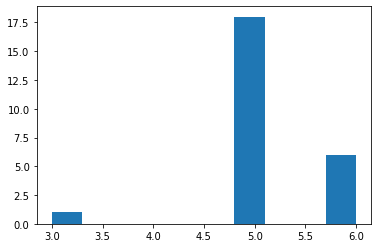

In [269]:
fig1 = plt.figure()
ax1 = plt.axes()

ax1.hist(show["test1"])

**testmethod2:**

(array([ 8.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  1.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <a list of 10 Patch objects>)

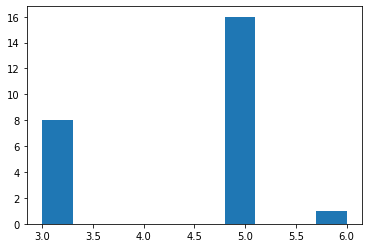

In [271]:
fig2 = plt.figure()
ax2 = plt.axes()

ax2.hist(show["test2"])

**testmethod3:**

(array([ 4.,  0.,  0.,  0.,  0.,  0., 19.,  0.,  0.,  2.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

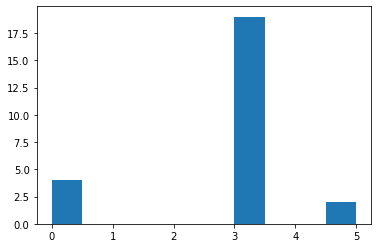

In [272]:
fig3 = plt.figure()
ax3 = plt.axes()

ax3.hist(show["test3"])

**testmethod4:**

(array([ 3.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  2.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

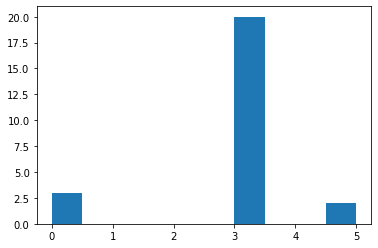

In [273]:
fig4 = plt.figure()
ax4 = plt.axes()

ax4.hist(show["test4"])

**Conclusion:** Selbst bei den Job-Descriptions, schlagen sich der normale Countvectorizer und Tfidfvectorizer am besten.